In [1]:
#PLEASE USE GOOGLE COLAB INSTEAD OF JUPYTER NOTEBOOK - Label encoder will not work in Jupyter Notebook
#Importing all libraries
#Requires installation of pandas, numpy, seaborn , sklearn and matplotlib libraries
#Can use pip install _______ in command line prompt on Windows workstation to install required libraries

from google.colab import files # use to import files from local drive for Google Colab - COMMENT OUT IF USING JUPYTER NOTEBOOK
import io # use to import files from local drive for Google Colab - COMMENT OUT IF USING JUPYTER NOTEBOOK
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from sklearn.preprocessing import LabelEncoder # Use to assign integer values to all string values using Label Encoder for categorical variables.
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz #use to visualize and classification tree - COMMENT OUT IF USING JUPYTER NOTEBOOK
from sklearn.externals.six import StringIO  #use to visualize and classification tree 
from IPython.display import Image  #use to visualize and classification tree
import pydotplus #use to visualize and classification tree
from sklearn.metrics import confusion_matrix # use for confusion matrix
from sklearn.metrics import accuracy_score # use to calculate accuracy score
from sklearn.metrics import classification_report # use to generate classification report
from sklearn.linear_model import LogisticRegression # Import Logistic Regression fit
from sklearn.metrics import r2_score # Use to calculate R^2 score of Logistic fit
from sklearn.ensemble import RandomForestClassifier # use to import Random Forest 




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Importing the data
uploaded = files.upload() # use to import files from local drive for Google Colab - COMMENT OUT IF USING JUPYTER NOTEBOOK
df_credit = pd.read_csv(io.BytesIO(uploaded['german_credit_data (1).csv'])) # Dataset is now stored in a Pandas Dataframe - COMMENT OUT IF USING JUPYTER NOTEBOOK

#use for Jupyter notebook
#df_credit = pd.read_csv("german_credit_data (1).csv",index_col=0) 

Saving german_credit_data (1).csv to german_credit_data (1).csv


In [3]:
df_credit.info() #Do not remove the NA values since only Savings and Checking account columns have 
                  #NA values which implies that the customer does not have an account

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [0]:
#Pre-Processing step 1
#COMMENT OUT IF USING JUPYTER NOTEBOOK
df_credit=df_credit.drop(["Unnamed: 0"],axis=1) # Drop the unnamed column. Don't re-run, unless you reload the dataset - you will get an error otherwise. 


In [5]:
#Data exploration
df_credit.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


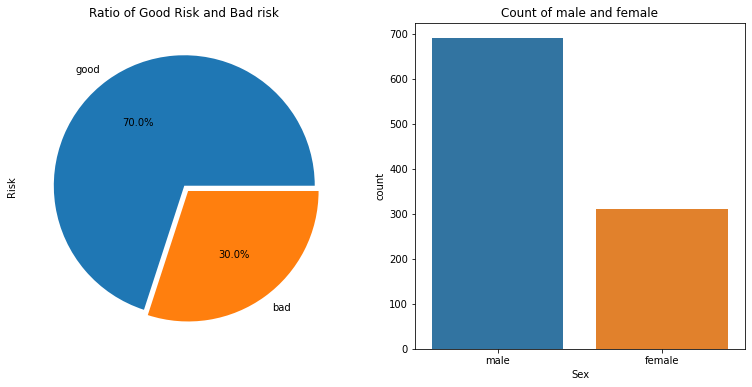

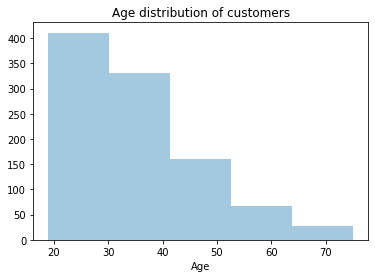

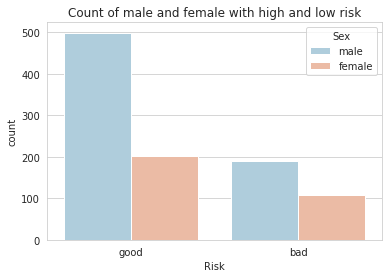

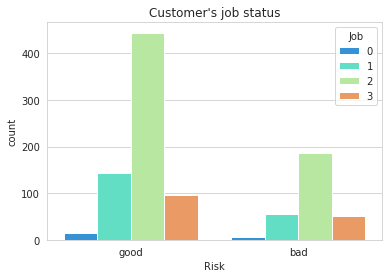

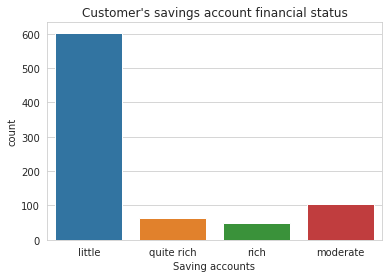

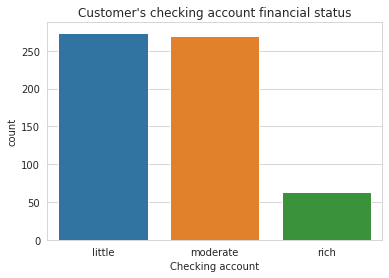

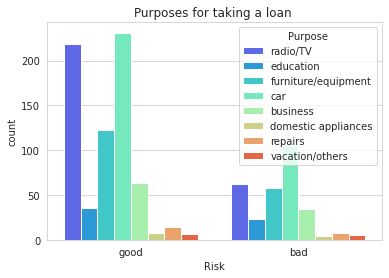

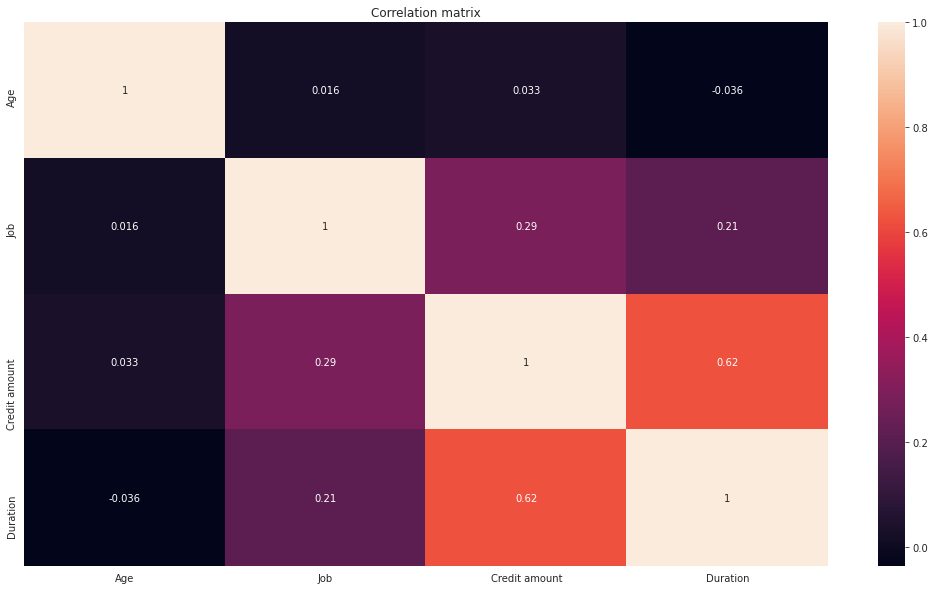

In [6]:
#Data visualization
fig,ax=plt.subplots(1,2,figsize=(13,6))
df_credit.Risk.value_counts().plot.pie(ax=ax[0], autopct='%.1f%%',explode=[0,0.05])  #pie chart to display the count of risk categories
ax[0].set_title('Ratio of Good Risk and Bad risk')
sns.countplot('Sex',data=df_credit, ax=ax[1]) #countplot to display the count of gender categories
ax[1].set_title('Count of male and female')
plt.show() 

#To visualize age variable
sns.distplot(df_credit['Age'],bins=5,kde=False)
plt.title("Age distribution of customers")
plt.show()

#To visualize 'Sex' variable
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Sex',data=df_credit,palette='RdBu_r')
plt.title("Count of male and female with high and low risk")
plt.show()

#To visualize 'Job' variable
sns.countplot(x='Risk',hue='Job',data=df_credit,palette='rainbow')
plt.title("Customer's job status")
plt.show()

#To visualize 'Saving accounts' variable
sns.countplot(x='Saving accounts',data=df_credit)
plt.title("Customer's savings account financial status")
plt.show()

#To visualize 'Checking account' variable
sns.countplot(x='Checking account',data=df_credit)
plt.title("Customer's checking account financial status")
plt.show()

#To visualize 'Purpose' variable
sns.countplot(x='Risk',hue='Purpose',data=df_credit,palette='rainbow')
plt.title('Purposes for taking a loan ')
plt.show()

#correlation matrix
corr = df_credit.corr()
corr

plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.title('Correlation matrix')
plt.show()

In [7]:
#Pre-processing step 2 - filling Checking and Saving acount NA values with NoAcc
df_credit['Checking account'].fillna('NoAccc',inplace=True)
df_credit['Checking account'].unique()
df_credit['Checking account'].value_counts()
df_credit['Saving accounts'].fillna('NoAcc',inplace=True)
df_credit['Saving accounts'].unique()
df_credit['Saving accounts'].value_counts()


little        603
NoAcc         183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [8]:
df_credit.isnull().sum() # verifying if NA values were filled

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [9]:
#checking distribution of all categorical variables
cols=df_credit.columns
for a in cols:
    if a not in ('Credit amount','Age','Duration'):
        print(a,':: ',df_credit[a].unique())

Sex ::  ['male' 'female']
Job ::  [2 1 3 0]
Housing ::  ['own' 'free' 'rent']
Saving accounts ::  ['NoAcc' 'little' 'quite rich' 'rich' 'moderate']
Checking account ::  ['little' 'moderate' 'NoAccc' 'rich']
Purpose ::  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk ::  ['good' 'bad']


In [10]:
#Pre-Processing step 3 
#Assign integer values to all string values using Label Encoder for categorical variables.
le = LabelEncoder()
df_credit['Sex'] = le.fit_transform(df_credit['Sex'])
df_credit['Housing'] = le.fit_transform(df_credit['Housing'])
df_credit['Saving accounts'] = le.fit_transform(df_credit['Saving accounts'])  
df_credit['Checking account'] = le.fit_transform(df_credit['Checking account']) 
df_credit['Purpose'] = le.fit_transform(df_credit['Purpose'])
df_credit['Risk'] = le.fit_transform(df_credit['Risk'])
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1,1169,6,5,1
1,22,0,2,1,1,2,5951,48,5,0
2,49,1,1,1,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0


In [0]:
#Splitting the data set in to training and test data sets
feature_cols = ['Age', 'Sex', 'Job', 'Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']
X = df_credit[feature_cols]
y = df_credit.Risk # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Check accuracy of classification tree
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6766666666666666


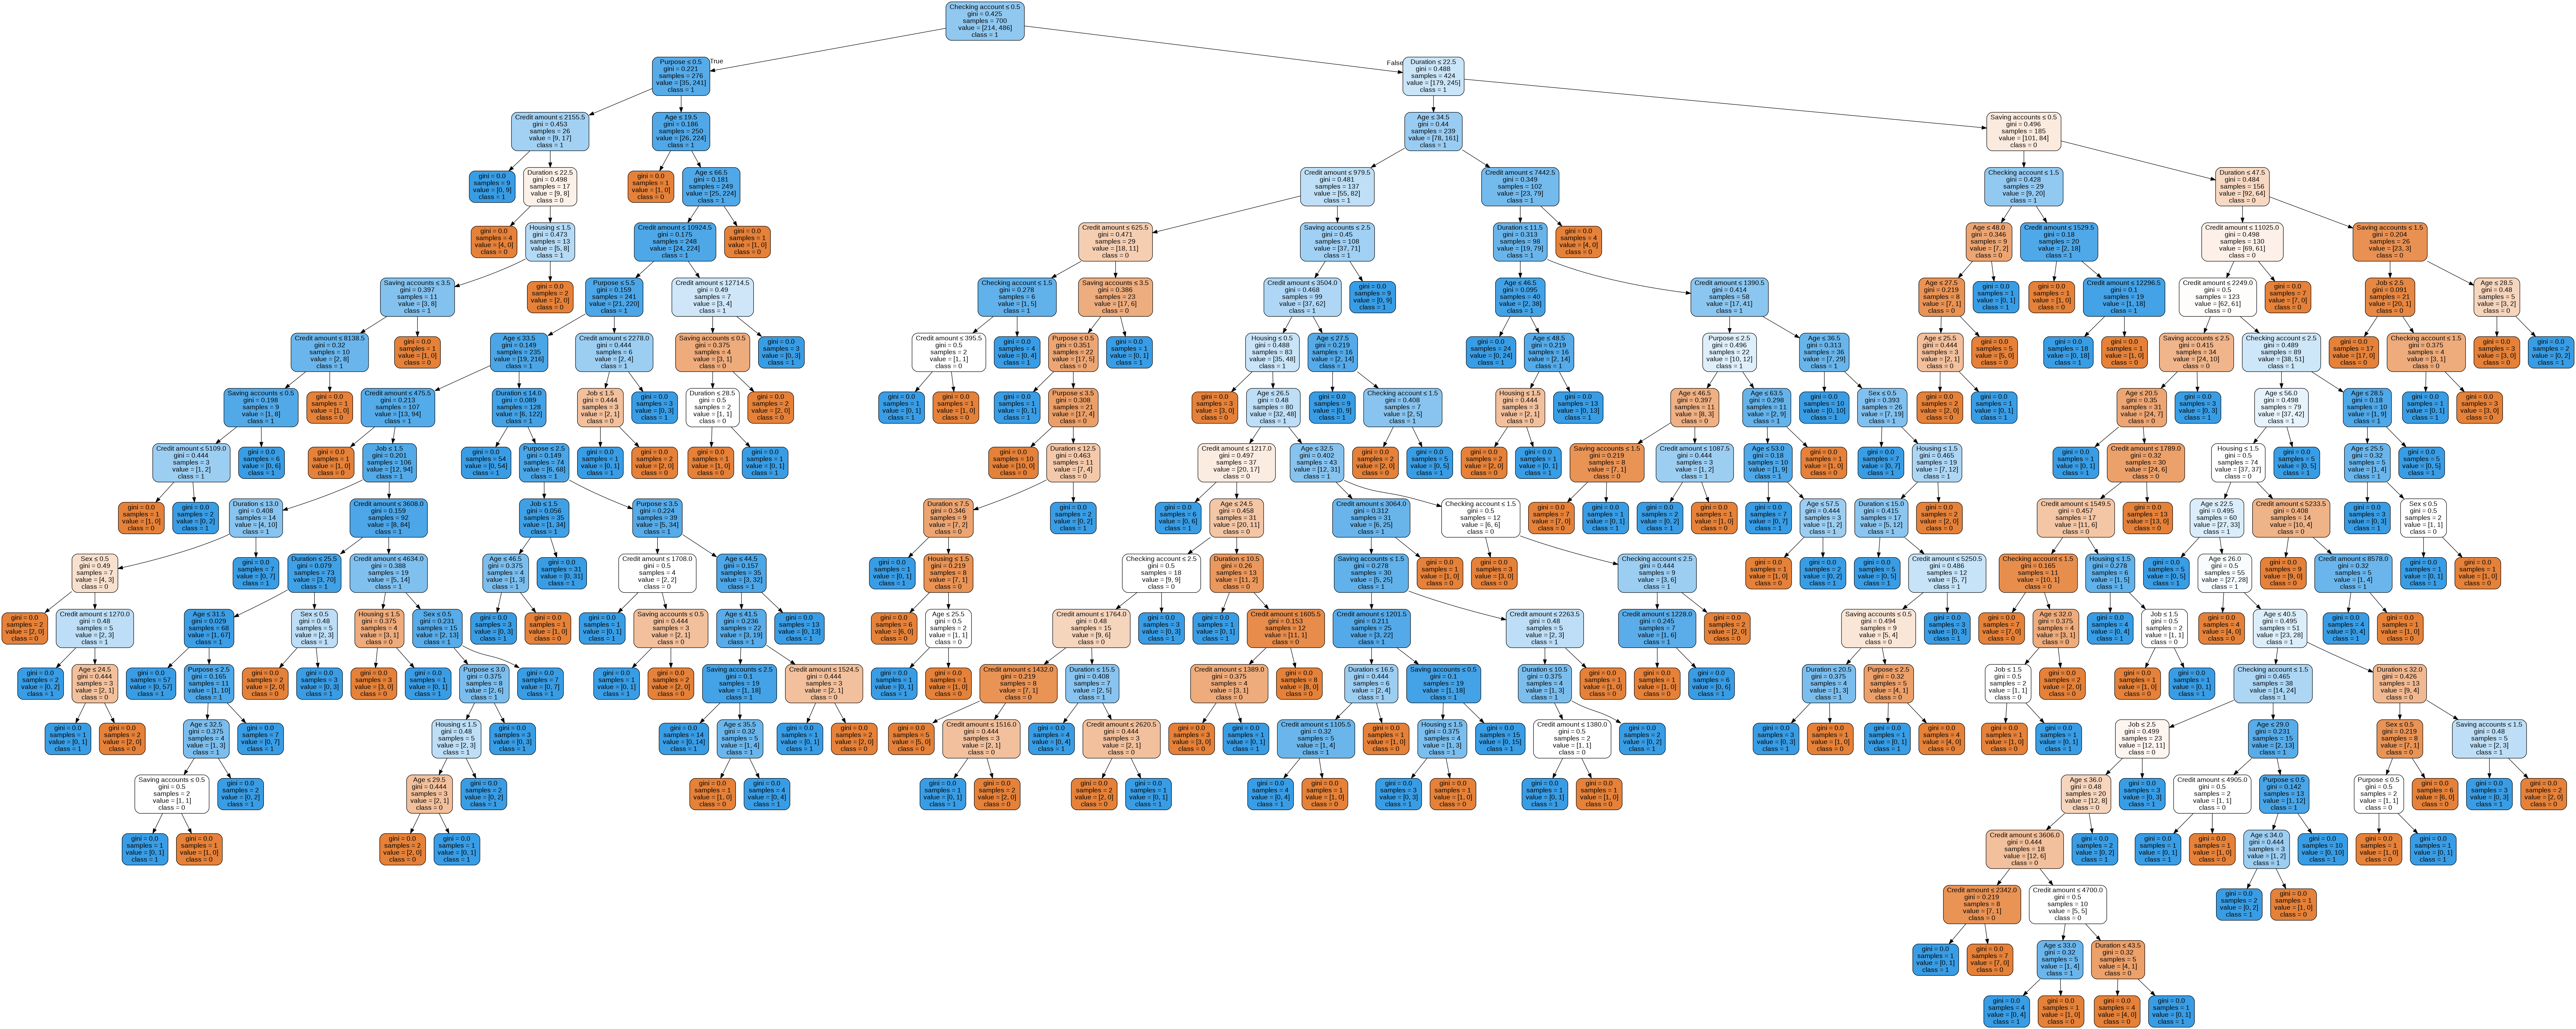

In [16]:
#Visualize the minimal error classification tree
#export graphviz doesn't work in Jupyter Notebook - COMMENT OUT IF USING JUPYTER NOTEBOOK 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,   
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Credit Risk.png')
Image(graph.create_png())

In [17]:
#Pruning the tree 
#Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7033333333333334


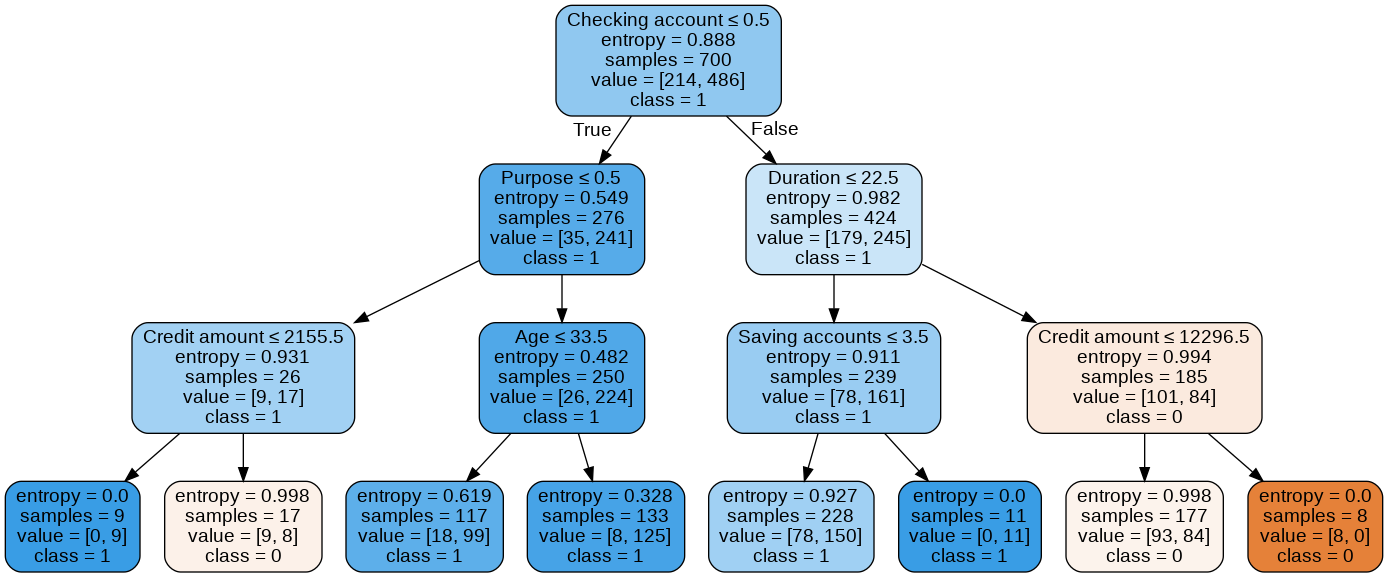

In [18]:
#Visualize the pruned tree
#export graphviz doesn't work in Jupyter Notebook - COMMENT OUT IF USING JUPYTER NOTEBOOK
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1']) # export graphviz doesn't work in Jupyter Notebook
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Credit Risk.png')
Image(graph.create_png())

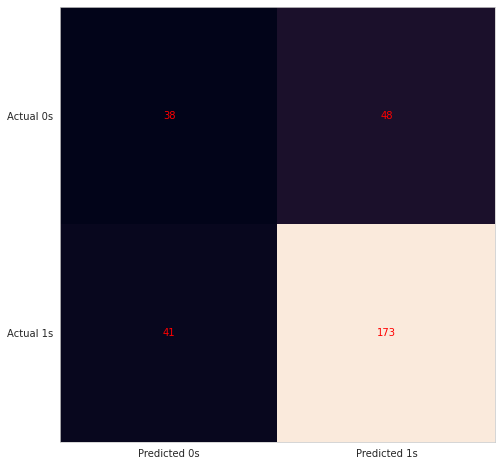

Accuracy Score : 0.7033333333333334
Report : 
              precision    recall  f1-score   support

           0       0.48      0.44      0.46        86
           1       0.78      0.81      0.80       214

    accuracy                           0.70       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.70      0.70      0.70       300



In [19]:
# Confusion matrix and classification report for Classification tree
actual=y_test
predicted=y_pred
results = confusion_matrix(actual, predicted) 

cm = confusion_matrix(actual, predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted))

AUC: 0.6936807215822647


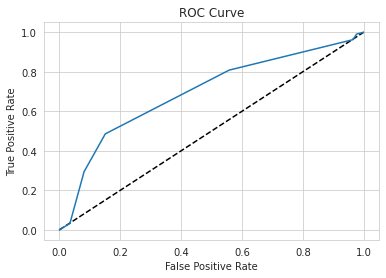

In [20]:
#ROC curve for classification tree
from sklearn.metrics import roc_curve
#Predicting probability
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC:',metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
# Logistic Regression Model 

#Create a model and train it
LR = LogisticRegression(solver='liblinear',random_state=0)
LR.fit(X_train,y_train)

# Step 4: Evaluate the model
y_pred = LR.predict(X_test)

print("R^2 value:",r2_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

R^2 value: -0.36926755053249294
Accuracy: 0.72


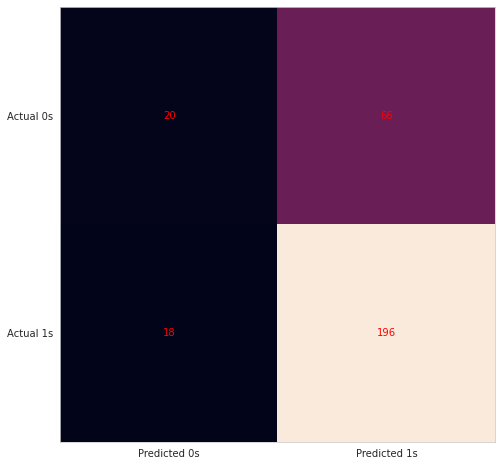

Accuracy Score : 0.72
Report : 
              precision    recall  f1-score   support

           0       0.53      0.23      0.32        86
           1       0.75      0.92      0.82       214

    accuracy                           0.72       300
   macro avg       0.64      0.57      0.57       300
weighted avg       0.68      0.72      0.68       300



In [22]:
# Confusion matrix and classification report for Logistic Regression
actual=y_test
predicted=y_pred
results = confusion_matrix(actual, predicted) 

cm = confusion_matrix(actual, predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted))

AUC: 0.6691480113018908


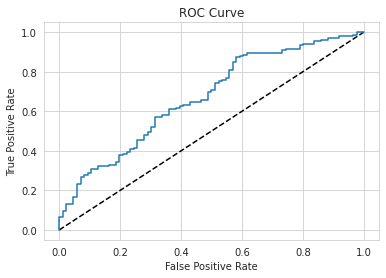

In [23]:
#ROC curve for Logistic Regression
#Predicting probability
y_pred_prob = LR.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC:',metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
#Random Forest
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy')
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
#Checking imporartnce of each variable
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

0.7433333333333333
                  importance
Credit amount       0.258566
Age                 0.181526
Duration            0.148087
Checking account    0.120385
Purpose             0.089061
Saving accounts     0.077888
Job                 0.053522
Housing             0.039770
Sex                 0.031196


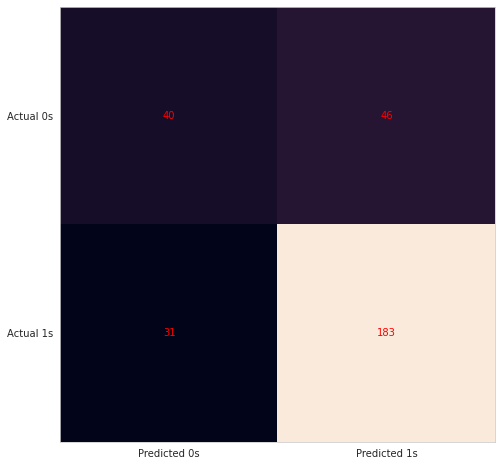

Accuracy Score : 0.7433333333333333
Report : 
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        86
           1       0.80      0.86      0.83       214

    accuracy                           0.74       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.73      0.74      0.74       300



In [34]:
# Confusion matrix and classification report for Random Forest
actual=y_test
predicted=y_pred
results = confusion_matrix(actual, predicted) 

cm = confusion_matrix(actual, predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted))

AUC: 0.6691480113018908


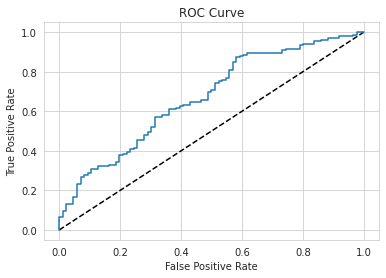

In [35]:
#ROC curve for Random forest
#Predicting probability
y_pred_prob = LR.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC:',metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()